# Teorema de Bayes

O teorema de Bayes é quase místico - um pouco de matemática que de alguma forma avalia magicamente uma situação. Mas esse místico tem mais a ver com sua reputação e aplicações avançadas do que o núcleo real dele - derivá-lo é  notavelmente simples e direto. Fizemos isso em uma de nossas primeiras aulas e não custa nada repetirmos aqui ...

### Lei da Probabilidade Total

Por definição, a probabilidade total de todos os $n$ resultados (eventos) possíveis para uma variável (espaço amostral) $A$ vale:

$$P(A) = \sum_n P(A_n) = 1$$


A lei da probabilidade total leva isso adiante, considerando duas variáveis ($A$ e $B$) e relacionando suas probabilidades marginais (suas probabilidades consideradas independentemente, sem referência uma à outra) e suas probabilidades condicionais (suas probabilidades consideradas em conjunto). Uma probabilidade marginal é simplesmente, p. ex., $P(A)$, enquanto uma probabilidade condicional é $P(A|B)$, que lê "probabilidade de $A$ *dado que* $B$ ocorreu".

A lei da probabilidade total diz que  a probabilidade total de $A$ é igual à soma da probabilidade condicional de $A$ em qualquer evento $B_n$ vezes a probabilidade desse evento $B_n$, para todos os eventos possíveis em $B$ .

$$P(A) = \sum_n P(A | B_n) P(B_n)$$

###  Lei da Probabilidade Condicionada

Para determinarmos a probabilidade de um evento condicionado à ocorrência de outros, devemos apelar voltar à teoria dos conjuntos e pensar na interseção dos conjuntos:

$$P(A|B) = \frac{P(A \cap B)}{P(B)}$$

Multiplica-se os dois lados da equação acima por $P(B)$, de modo que $P(A|B)P(B) = P(A \cap B)$. Pode-se repetir o raciocínio para $P(B|A)$ e, portanto,  concluir que $P(B|A)P(A) = P(B \cap A) = P(A \cap B)$

### Teorema de Bayes

Finalmente, define-se :

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

i é, a probabilidade de $ A $ condicionada a $ B $ é a probabilidade de $ B $ condicionada a $ A $, multiplicada pela probabilidade de $ A $ e dividida pela probabilidade de $ B $. Essas probabilidades incondicionadas são referidas como "crenças anteriores" e as probabilidades condicionadas como "posterior" e "verossimilhança".

Substituindo-se $A$ e $B$ por variáveis, agora, com sentido mais  objetivo, reescreve-se o teorema de Bayes é definido como,
$$
p(H|E)=p(H) \frac{p(E|H)}{p(E)}
$$

__p(H) a priori:__ reflete nossa crença, o que sabemos sobre o valor do parâmetro que estamos analisando antes de ver os dados. Isso pode se referir a ensaios, experiências anteriores, busca na literatura, etc... 

__p(E|H) verossimilhança__: probabilidade de vermos a nossa evidência se nossa hipótese está correta, ié, qual é a possibilidade de que nossos dados sejam observados, dada nossa crença prévia?

__p(H|E) a posteriori:__ é resultado da análise bayesiana e reflete tudo o que sabemos sobre um problema, a partir de nossos dados e modelo.

__p(E) evidência:__ probabilidade marginal, de observar os dados em qualquer circunstância, isto é, com todos os valores possíveis que os parâmetros podem assumir. Também conhecido como fator normalizador, garantindo que a distribuição a posteriori esteja entre $0-1$.

Dado que $p(E)$ é considerado normalizador, 
$$
p(H|D) \propto p(D|H) * p(H)
$$

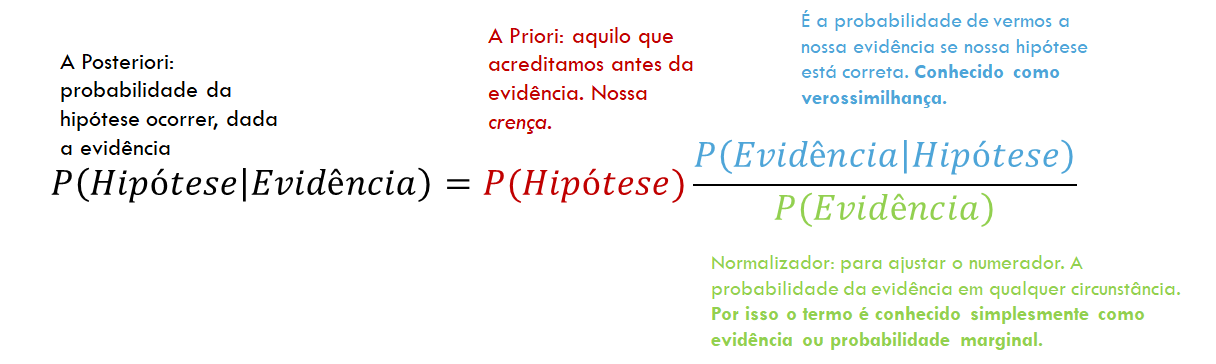

## Exemplo do Bafômetro

Você sabe que $8\%$ dos testes de bafômetro são positivos. Você pode pensar que exatos $100\%$ de verdadeiros positivos (detectar alguém que está bêbado) é muito bom, mas e se ele também tiver falso positivo (indicando que alguém está bêbado quando não está)? 

Digamos que a taxa de motoristas embriagados (e, portanto, nossa crença inicial) é de $1\%$. Qual a probabilidade de você estar bêbado, dado que o exame deu positivo? 

Veja mais detalhes sobre o teorema de Bayes e o exemplo usado aqui em [testes de bafômetro](https://www.bayestheorem.net/breathalyzer-example/). 





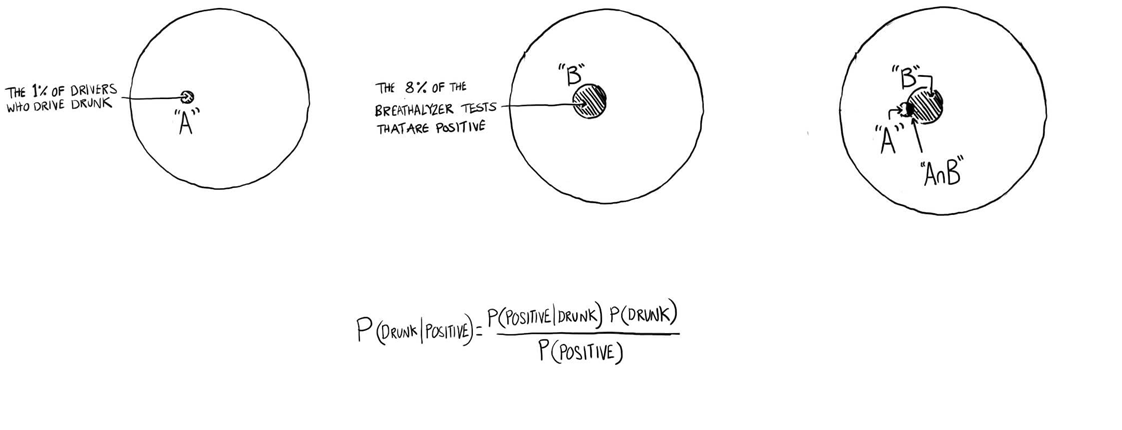

Qual é a probabilidade de alguém realmente estar bêbado se o teste der positivo? 
$$
\begin{aligned}
P(Bêbado | Positivo) &= \frac{P(Positivo | Bêbado)P(Bêbado)}{P(Positivo)} \\
&= \frac{1 \times 0.01}{0.08} \\
&= 0.125 = 12.5\%
\end{aligned}
$$

O Teorema de Bayes, portanto,nos ajuda a quantificar o ceticismo e nos permite ter um entendimento mais claro do problema. Originalmente, pensávamos que a probabilidade de o motorista estar bêbado era bastante alta, mas agora vemos que é apenas cerca de $11.21\%$.

Deve-se ressaltar que existem alguns pontos improtantes, e o principal, nesse caso, é a aleatoriedade do teste. isto é, o motorista foi parado por causa da maneira que estava dirigindo, ou decidiram fazer o bafômetro pela atitude do motorista??? 

Outra questão que vale a pena discutir é que, por isso é importante repetir o teste para confirmar. A probabilidade de dois falsos positivos consecutivos é de $ 0.08 \times 0.08 = 0.0064 $.

In [22]:
pPB = 1.
pB = 0.01
pnB = 1.- pB
pP = 0.08
print('Probabilidade de estar bêbado, dado que deu positivo é: {:5.2%}'.format(pPB*pB/(pP)))
print('Probabilidade de falso positivo é: {:5.2%}'.format((pP-pPB*pB)/pnB))

Probabilidade de estar bêbado, dado que deu positivo é: 12.50%
Probabilidade de falso positivo é: 7.07%


In [23]:
# Install PyMC3 library if not installed

try:
  print(pymc3.__version__)

except:
  !pip install pymc3
  !pip install arviz

"""!pip install tensorflow_probability==0.8.0rc0"""

'!pip install tensorflow_probability==0.8.0rc0'

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import pandas as pd

import arviz as az
import pymc3 as pm
from theano import shared
from sklearn import preprocessing

%matplotlib inline
plt.style.use('seaborn-whitegrid')

## Lançamento de moeda

Queremos analisar a probabilidade de cara de uma moeda. Em outras palavras, queremos analisar se a moeda é equilibrada ou se há um viés na probabilidade de caras. Nosso parâmetro $\theta$, portanto, é a probabilidade de cara da moeda.


Vamos gerar nossa metodologia Bayesiana. O teorema de Bayes diz que precisamos pensar tanto em nossa distribuição amostral quanto em nossa distribuição anterior $p(\theta)$. Podemos partir de duas ideias para nossa probabilidade a priori:

1.   Sem nem mesmo jogar a moeda uma vez, usa-se a experiência passada em observações de moedas e, portanto, espera-se que a probabilidade de observar caras seja 0.5.
2.   Não se tem nenhuma ideia sobre isso, e considera-se uma distribuição igual para qualquer valor de $\theta$ entre zero e 1.


Vamos supor que, a priori, a moeda seja honesta.

In [25]:
moeda_prior = np.random.binomial(n = 1, p = 0.5, size = 100)
moeda_prior[:10]

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1])

In [0]:
# Valores entre 0-1 que varrem todo espaço de valores que o parâmetro theta pode assumir
param = np.linspace(0,1,100)

 0.461
 0.460


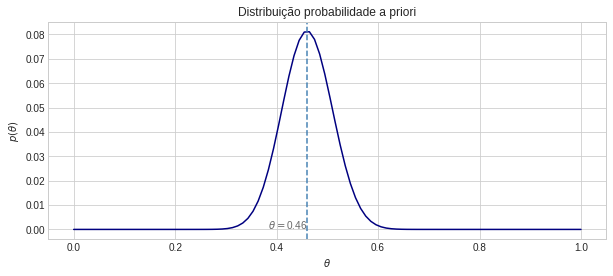

In [27]:
#A distribuição de probabilidade a priori será a probabilidade de encontrarmos os valores 
#que definimos como moeda_prior para cada valor válido do parâmetro, que definimos em param
theta_prior = np.array([np.product(st.bernoulli.pmf(moeda_prior, p)) for p in param])
# Normalizamos o valor, dado que não nos preocuparemos com p(E)
theta_prior = theta_prior/np.sum(theta_prior)
theta_initial = theta_prior


fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

#se você tiver valores de dados, x1, ..., xn e probabilidades desses valores p1, ..., pn 
#um estimador para o valor esperado expec é dado por
expec = 0
time = 0
for datum in theta_prior:
  expec += param[time] * datum
  time += 1
print('{:6.3f}'.format(expec))
print('{:6.3f}'.format(np.mean(moeda_prior)))

plt.plot(param, theta_prior, color='navy')
plt.axvline(x=expec, color='steelblue', linestyle='--')
ax.text(expec, 0.0005, r'$\theta=$'+ '{:04.2f}'.format(expec), ha='right', **style)
# Label the axes
ax.set(title='Distribuição probabilidade a priori', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
plt.show()

Novamente, precisamos simular dados. Supomos que nossa moeda é viesada, e dá cara $70\%$ das vezes. Veja que o valor real $\theta=0.7$ é o valor que não temos e estamos procurando. Estamos usando aqui para simularmos a criação da distribuição de amostragem.

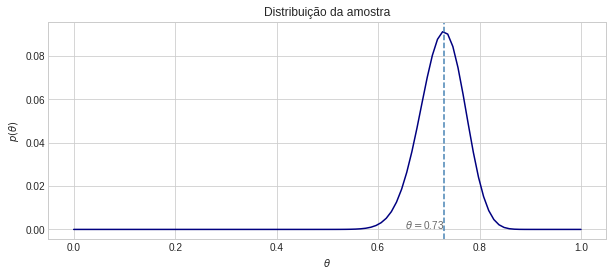

In [28]:
# Verossimilhança

moeda_obs = np.random.binomial(n=1, p=0.7, size = 100)
theta_obs = np.array([np.product(st.bernoulli.pmf(moeda_obs, p)) for p in param])

theta_obs = theta_obs/np.sum(theta_obs)
fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

aux = np.mean(moeda_obs)
plt.plot(param, theta_obs, color='navy')
plt.axvline(x=aux, color='steelblue', linestyle='--')
ax.text(aux, 0.0005, r'$\theta=$'+ str(aux), ha='right', **style)
# Label the axes
ax.set(title='Distribuição da amostra', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
plt.show()

Embora as observações de nossa distribuição amostral indiquem uma probabilidade em torno de $0.7$, temos uma crença inicial de que nosso parâmetro é $\theta = 0.5$. A nossa distribuição posterior levará em conta nossa observação e nossas crenças, de modo que:
$$
p(H|E) \propto p(E|H) * p(H)\ OU \ Posterior\ \propto Verossimilhança\ *  Prior
$$

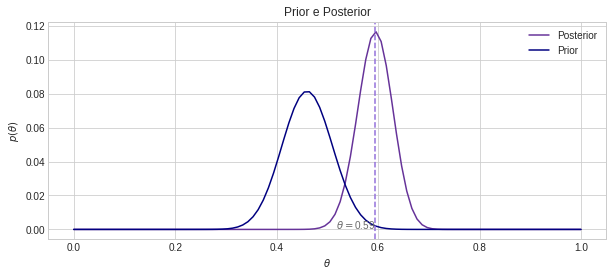

In [29]:
theta_posterior = [theta_prior[i] * theta_obs[i] for i in range(len(theta_prior))]
theta_posterior = theta_posterior/np.sum(theta_posterior)

expec = 0
time = 0
for datum in theta_posterior:
  expec += param[time] * datum
  time += 1

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

plt.plot(param, theta_posterior, color = 'rebeccapurple',label='Posterior')
plt.plot(param, theta_prior, color='navy',label='Prior')
# Label the axes
plt.axvline(x=expec, color='mediumpurple', linestyle='--')
ax.set(title='Prior e Posterior', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
ax.text(expec, 0.0005, r'$\theta=$'+ '{:04.2f}'.format(expec), ha='right', **style)
plt.legend()
plt.show()


Andamos muito pouco para estarmos convencidos de que nossa  moeda não é equilibrada. 

O caminho agora é considerar a distribuição a posterior como prior. E lançarmos a moeda $n=100$ vezes novamente.

In [30]:
theta_prior = theta_posterior
# Verossimilhança
moeda_obs = np.random.binomial(n=1, p=0.7, size = 100)
theta_obs = np.array([np.product(st.bernoulli.pmf(moeda_obs, theta)) for theta in param])
theta_obs = theta_obs/np.sum(theta_obs)
aux = np.mean(moeda_obs)
print(aux)

0.65


0.6125827814569538


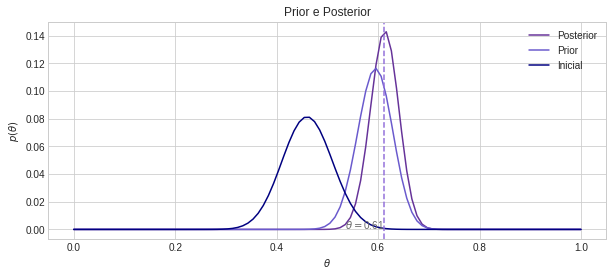

In [31]:
theta_posterior = [theta_prior[i] * theta_obs[i] for i in range(len(theta_prior))]
theta_posterior = theta_posterior/np.sum(theta_posterior)

fig, ax = plt.subplots(figsize=(10, 4))
style = dict(size=10, color='dimgrey')

expec = 0
time = 0
for datum in theta_posterior:
  expec += param[time] * datum
  time += 1
print(expec)

plt.plot(param, theta_posterior, color = 'rebeccapurple',label='Posterior')
plt.plot(param, theta_prior, color='slateblue',label='Prior')
plt.plot(param, theta_initial, color='navy',label='Inicial')
plt.axvline(x=expec, color='mediumpurple', linestyle='--')
ax.text(expec, 0.0005, r'$\theta=$'+ '{:04.2f}'.format(expec), ha='right', **style)
ax.set(title='Prior e Posterior', xlabel=r'$\theta$',
       ylabel=r'$p(\theta)$')
plt.legend()
plt.show()

### <font color=green > Sua tarefa
<font color=green > E se tivéssemos partido da ideia que não sabemos nada sobre a honestidade da moeda?

<font color=green > Dica, use a seguinte distribuição de probabilidade para priori,

`theta_prior = np.ones(len(param))/len(param)`

## Pressão arterial dos paulistanos

Supondo que se queira conhecer a pressão arterial média dos paulistanos.

Qual seria nosso primeiro passo? Qual nossa crença???

Conversando com especialistas, sabe-se que a distribuição da pressão arterial pode ser aproximada como uma distribuição normal com média de $85 mm$ e desvio padrão de $20 mm$. 

**Ótimo! Vamos partir daí!** Essa será nossa crença inicial,

$$
\text{ Pressão arterial dos Paulistanos} \sim N(85,20^2)
$$

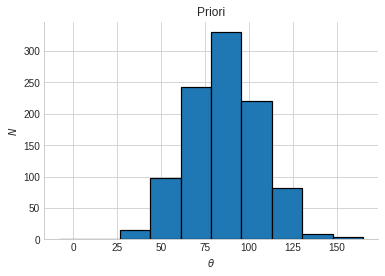

In [33]:
np.random.seed(48)
prior_distribution = np.random.normal(85, 20, 1000)
fig, ax = plt.subplots()
plt.hist(prior_distribution,edgecolor='black', linewidth=1.2)
ax.set(title='Priori', xlabel=r'$\theta$',
       ylabel=r'$N$')
sns.despine()

Agora, digamos que estamos coletando observações de pressões arteriais de alguns moradores, e queremos, a partir de cada dado, atualizar nossa crença inicial, ié, calcular uma nova distribuição posterior.

Usaremos o equacionamento que deduzimos em sala,

$$\sigma^2_n = \frac{\sigma_{obs}^2\sigma_{pr}^2}{\sigma_{obs}^2 + N\sigma_{pr}^2}$$

$$\mu_n = \frac{\sigma_{obs}^2\mu_{pr} + \sigma_{pr}^2N\bar{x}}{\sigma_{obs}^2 + \sigma_{prior}^2}=\sigma^2_N \left( \frac{\mu_{pr}}{\sigma_{pr}^2}+\frac{N\bar{x}}{\sigma_{obs}^2} \right)$$

Porém, como atualizaremos a cada novo dado, as equações acima podem ser simplificadas como

$$\sigma^2_n = \frac{\sigma_{obs}^2\sigma_{pr}^2}{\sigma_{obs}^2 + \sigma_{pr}^2}$$

$$\mu_n = \frac{\sigma_{obs}^2\mu_{pr} + \sigma_{pr}^2{x}}{\sigma_{obs}^2 + \sigma_{prior}^2}=\sigma^2_N \left( \frac{\mu_{pr}}{\sigma_{pr}^2}+\frac{x}{\sigma_{obs}^2} \right)$$


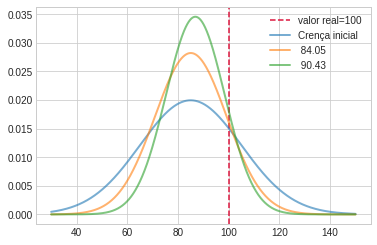

In [34]:
#Novamente, para simularmos uma amostragem aleatória usaremos os dados corretos (média 100,var=10^2)
#Supondo que, ao final, coletaremos N amostras.
np.random.seed(48)
N=1001
observed_distribution = np.random.normal(100, 15, size=N)

#Geramos um vetor de médias e outro de variâncias onde acumularemos nossas atualizações
mu = [0] * N
sigma = [0] * N

mu[0] = 85
sigma[0] = 20**2

sigma[1] = (sigma[0]*sigma[0])/(sigma[0]+sigma[0])
mu[1] = (sigma[0]*observed_distribution[0] + sigma[0]*mu[0])/(sigma[0]+sigma[0])


for i in range(1,1000):
    sigma[i + 1] = (sigma[i]*sigma[0])/(sigma[i]+sigma[0])
    mu[i + 1] = sigma[i + 1]*(observed_distribution[i+1]/sigma[0] + mu[i]/sigma[i])
    
intervalo = np.arange(30,150, 0.01)
fig, (ax) = plt.subplots()
#
plt.axvline(x=100, ymin=0, ymax=1, color='crimson', linestyle='--', label='valor real=100')
sns.lineplot(intervalo, st.norm.pdf(intervalo,loc=mu[0], scale = np.sqrt(sigma[0])), lw=2, alpha=0.6,label='Crença inicial')
sns.lineplot(intervalo, st.norm.pdf(intervalo,loc=mu[1], scale = np.sqrt(sigma[1])), lw=2, alpha=0.6,label='{:6.2f}'.format(observed_distribution[1]))
sns.lineplot(intervalo, st.norm.pdf(intervalo,loc=mu[2], scale = np.sqrt(sigma[2])), lw=2, alpha=0.6,label='{:6.2f}'.format(observed_distribution[2]))
plt.show()



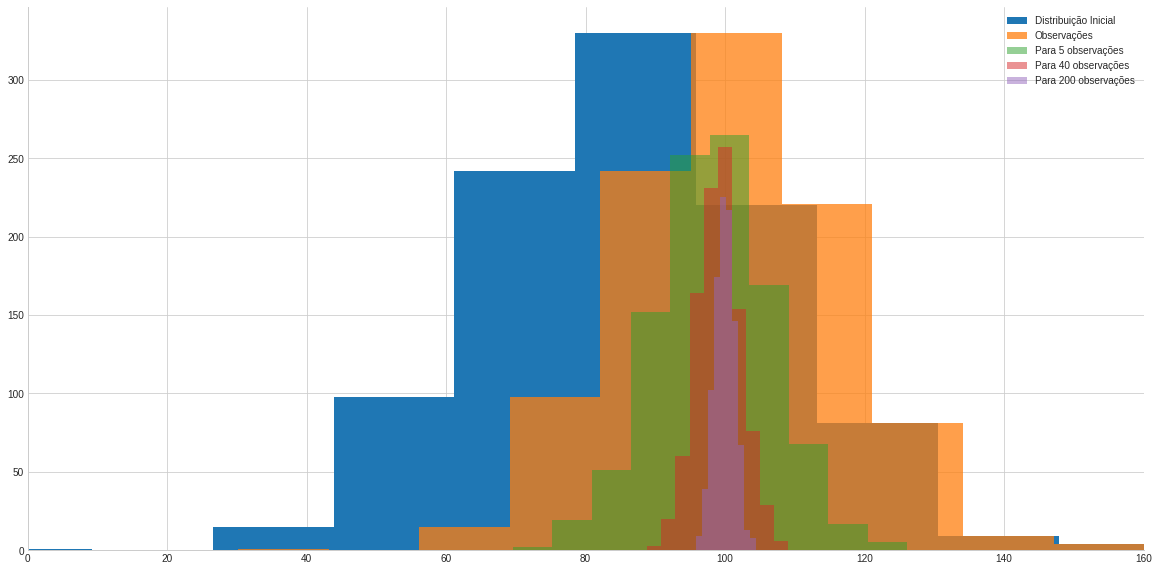

In [35]:
labels = (5, 40, 200, 400)
plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_xlim([0,160])

plt.hist(prior_distribution, label = 'Distribuição Inicial')
plt.hist(observed_distribution, alpha = 0.75,label = 'Observações')
j=0
posterior_distributions = [0]*len(labels)
for i in labels:
  posterior_distributions[j] = np.random.normal(mu[i], np.sqrt(sigma[i]), 1000)
  if j != len(labels)-1:
    plt.hist(posterior_distributions[j], alpha = 0.5, label = 'Para '+str(i)+' observações')
  j = j + 1
plt.legend()
sns.despine()

# Decisões baseadas em probabilidade posterior
Às vezes, descrever o modelo de probabilidade posterior não é suficiente. Às vezes, precisamos tomar decisões com base em nossas inferências. Temos que reduzir uma estimativa contínua para uma dicotômica: sim-não, saúde-doença, válido - não válido e assim por diante. 


## Intervalo de Credibilidade
Uma vez definida a distribuição posterior que representa o conhecimento atualizado sobre um parâmetro de interesse, a obtenção do ICr é simples. Existem dois tipos de ICr Bayesianos: 


*   intervalo com caudas iguais (ETI, do inglês *equal-tailed interval*)
*   maior intervalo de densidade posterior (HPD, do inglês *highest posterior density*)



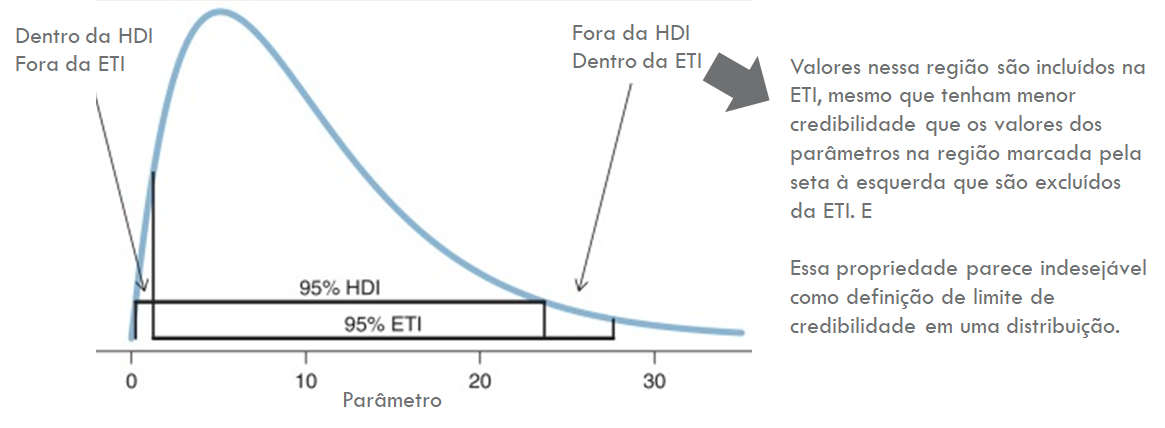


Limite inferior = 98.451
Limite superior = 101.737


Text(100, 0.01, 'ICr = 0.9')

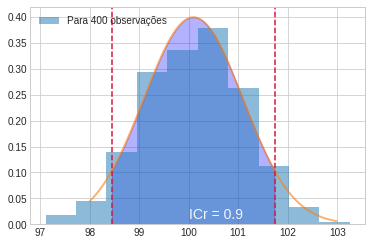

In [37]:
#Intervalo de credibilidadede 90% 
i=3
n=labels[i]
alpha=0.1
confidence = 1.-alpha

l_inf = st.norm.ppf(alpha/2.,loc=mu[n], scale = np.sqrt(sigma[n]))
l_sup = st.norm.ppf(confidence+alpha/2., loc=mu[n], scale = np.sqrt(sigma[n]))
print('Limite inferior = {:6.3f}'.format(l_inf))
print('Limite superior = {:6.3f}'.format(l_sup))

intervalo = np.arange(98,103, 0.01)
intervalo1 = np.arange(l_inf,l_sup, 0.01)

fig, (ax) = plt.subplots()
#
plt.hist(posterior_distributions[i], alpha = 0.5, density=True, label = 'Para '+str(labels[i])+' observações')
sns.lineplot(intervalo, st.norm.pdf(intervalo,loc=mu[n], scale = np.sqrt(sigma[n])), lw=2, alpha=0.6)
ax.fill_between(intervalo1, st.norm.pdf(intervalo1,loc=mu[n], scale = np.sqrt(sigma[n])), 0, alpha=0.3, color='b')
plt.axvline(x=l_inf, ymin=0, ymax=1, color='crimson', linestyle='--')
plt.axvline(x=l_sup, ymin=0, ymax=1, color='crimson', linestyle='--')


ax.text(100, 0.01, 'ICr = {:2.3}'.format(1.-alpha), color='whitesmoke', fontsize=14)


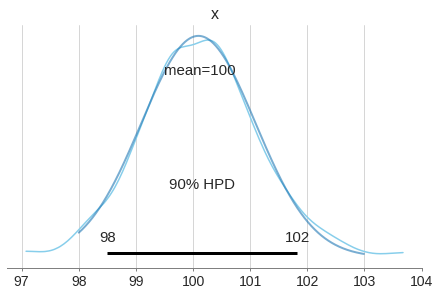

In [0]:
az.plot_posterior(posterior_distributions[i], color='#87ceeb', credible_interval=0.9, point_estimate='mean')
sns.lineplot(intervalo, st.norm.pdf(intervalo,loc=mu[n], scale = np.sqrt(sigma[n])), lw=2, alpha=0.6)
plt.show()

In [0]:
# a função tem um sumário que mostra o intervalo de confiança
az.summary(posterior_distributions[i], credible_interval=0.9)

arviz.stats.stats_utils - WARNING - Shape validation failed: input_shape: (1, 1000), minimum_shape: (chains=2, draws=4)


,mean,sd,hpd_5%,hpd_95%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
x,100.126,1.007,98.498,101.823,0.031,0.022,1060.0,1059.0,1067.0,992.0,NaN


# Região de equivalência prática  (ROPE)

Podemos precisar decidir se a moeda é equilibrada ou não. Uma moeda equilibrada é aquela com um valor $p_{cara}=p_{coroa}= 0.5$ e podemos comparar o valor de $0.5$ com o intervalo HPD.

A rigor, a chance de observar exatamente $0.5$ é zero. Além disso, na prática, geralmente não nos importamos com resultados exatos, mas com resultados dentro de uma certa margem. Como a abordagem bayesiana oferece uma visão probabilística dos parâmetros, permite avaliar a incerteza a eles relacionada.
Assim, em vez de concluir que um efeito está presente quando ele simplesmente difere de zero, concluiríamos que a probabilidade de estar fora de um intervalo específico que pode ser considerado como *praticamente sem efeito* (isto é, uma magnitude desprezível) é suficiente. Esse intervalo é chamado de *região de equivalência prática* (ROPE, do inglês *Region of Practical Equivalence*).

Portanto, a ideia subjacente a ROPE é permitir a definição de uma área em torno do valor nulo, que inclua valores equivalentes ao valor nulo para fins práticos.

Sob esse ponto de vista, podemos relaxar a definição de justiça e dizer que uma moeda *honesta* é aquela com um valor *em torno de 0.5*. Por exemplo, poderíamos dizer que qualquer valor no intervalo $[0.45, 0.55]$ será, para nossos propósitos, praticamente equivalente a $0.5$. 

**Teste de Equivalência**

A ROPE, sendo uma região correspondente a uma hipótese *nula*, é usado para o teste de equivalência, para testar se um parâmetro é significativo (no sentido de importante o suficiente para ser tratado). Uma vez definida a ROPE, comparamos com a maior densidade a posteriori (HPD) para verificar se os valores dos parâmetros devem ser aceitos ou rejeitados contra uma *hipótese nula* explicitamente formulada (ou seja, uma ROPE). 

Existem três cenários possíveis, verificando-se a porcentagem de HPD que se sobrepõe à ROPE,
* percentual for suficientemente baixo, a hipótese nula será rejeitada;
* percentual for suficientemente alto, a hipótese nula será aceita; 
* não podemos concluir nada...

Se escolhermos uma ROPE no intervalo $[0, 1]$, sempre aceitaremos a hipótese nula. Observe que não precisamos nem coletar dados para realizar qualquer tipo de inferência. Obviamente, essa é uma escolha trivial, sem sentido. Mas, com ela destaca-se que a definição da ROPE depende do contexto; não existe uma regra de magia automática que atenda às intenções de todos. As decisões são inerentemente subjetivas e nossa missão é tomar as decisões mais informadas possíveis, de acordo com nossos objetivos.

Veja o exemplo abaixo, de uma moeda com probabilidade de cara de $70\%$.

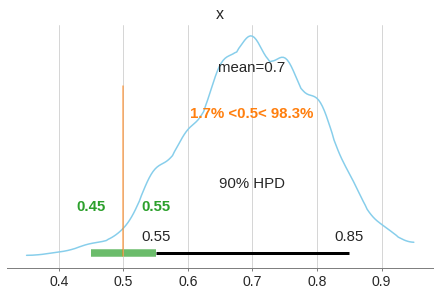

In [0]:
moeda_obs = np.random.binomial(20, p=0.7, size=1000)
moeda_obs = moeda_obs/20
az.plot_posterior(moeda_obs, color='#87ceeb', credible_interval=0.9,
                  rope=[0.45,0.55], point_estimate='mean', ref_val=0.5)
plt.show()

Para estabelecermos, por exemplo, que a pressão arterial do paulistano é equivalente à da população brasileira em geral, vamos estabelecer uma ROPE entre $\pm 0.5\sigma = 85 \pm 10$

Sugestões para definição da [ROPE](https://cran.r-project.org/web/packages/bayestestR/vignettes/region_of_practical_equivalence.html). Porém, aqui estamos iniciando o assunto, e discutir mais profundamente está fora doe scopo de nosso curso.

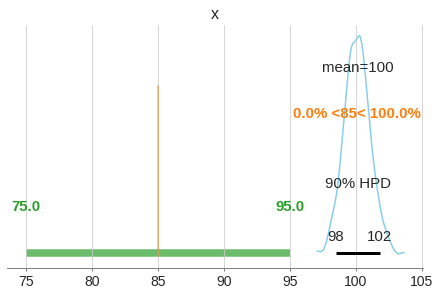

In [0]:
az.plot_posterior(posterior_distributions[i], color='#87ceeb', credible_interval=0.9,
                  rope=[75.,95.], point_estimate='mean', ref_val=85)
plt.show()

Acho que não há dúvidas quanto à rejeição da hipótese nula.


# Distribuições conjugadas

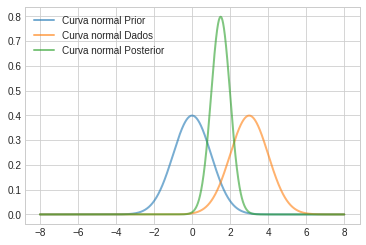

In [0]:
# prior
mu_0,sigma2_0 = 0.,1.

# data
mu = 3
N = 1
sigma2 = 1

# post
sigma2_N = 1/(N/sigma2 + 1/sigma2_0)
mu_N = sigma2_N*(N*mu/sigma2 + mu_0/sigma2_0)


# 
intervalo = np.arange(-8,8,0.001)
fig, ax = plt.subplots(1, 1)
sns.lineplot(intervalo, st.norm.pdf(intervalo),lw=2, alpha=0.6, label='Curva normal Prior')
sns.lineplot(intervalo, st.norm.pdf(intervalo, loc=mu, scale=sigma2),lw=2, alpha=0.6, label='Curva normal Dados')
sns.lineplot(intervalo, st.norm.pdf(intervalo, loc=mu_N, scale=sigma2_N),lw=2, alpha=0.6, label='Curva normal Posterior')

## Função Beta

A distribuição Beta é dada pela expressão,
\begin{equation}
 p(x:\alpha,\beta) = \frac{1}{B(\alpha,\beta)}x^{\alpha - 1}(1 - x)^{\beta - 1}
\end{equation}
onde,
\begin{equation}
 B(\alpha,\beta) = \frac{\Gamma(\alpha +
\beta)}{\Gamma(\alpha)\Gamma(\beta)}
\end{equation}
para números reais,
\begin{equation}
\Gamma(n)= \left(n-1 \right)!
\end{equation} 

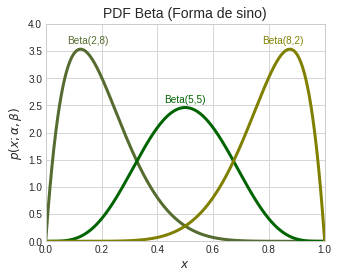

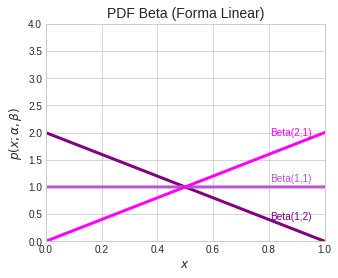

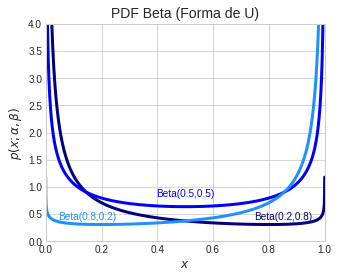

In [39]:
plt.rcParams['figure.figsize'] = [5, 4]

# Bell shape
x = np.linspace(0, 1, 10000)
y1 = st.beta.pdf(x, 2, 8)
y2 = st.beta.pdf(x, 5, 5)
y3 = st.beta.pdf(x, 8, 2)

plt.title("PDF Beta (Forma de sino)", fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$p(x;\alpha,\beta)$', fontsize=12)
plt.plot(x, y1, linewidth=3, color='darkolivegreen')
plt.annotate("Beta(2,8)", xy=(0.15, 3.7), size = 10, ha='center', va='center', color='darkolivegreen')
plt.plot(x, y2, linewidth=3, color='darkgreen')
plt.annotate("Beta(5,5)", xy=(0.5, 2.6), size = 10, ha='center', va='center', color='darkgreen')
plt.plot(x, y3, linewidth=3, color='olive')
plt.annotate("Beta(8,2)", xy=(0.85, 3.7), size = 10, ha='center', va='center', color='olive')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()

# Straight lines
x = np.linspace(0, 1, 10000)
y1 = st.beta.pdf(x, 1, 2)
y2 = st.beta.pdf(x, 1, 1)
y3 = st.beta.pdf(x, 2, 1)

plt.title("PDF Beta (Forma Linear)", fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$p(x;\alpha,\beta)$', fontsize=12)
plt.plot(x, y1, linewidth=3, color='purple')
plt.annotate("Beta(1,2)", xy=(0.88, 0.45), size = 10, ha='center', va='center', color='purple')
plt.plot(x, y2, linewidth=3, color='mediumorchid')
plt.annotate("Beta(1,1)", xy=(0.88, 1.15), size = 10, ha='center', va='center', color='mediumorchid')
plt.plot(x, y3, linewidth=3, color='magenta')
plt.annotate("Beta(2,1)", xy=(0.88, 2.0), size = 10, ha='center', va='center', color='magenta')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()

# U-shape
x = np.linspace(0, 1, 10000)
y1 = st.beta.pdf(x, 0.2, 0.8)
y2 = st.beta.pdf(x, 0.5, 0.5)
y3 = st.beta.pdf(x, 0.8, 0.2)

plt.title("PDF Beta (Forma de U)", fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$p(x;\alpha,\beta)$' , fontsize=12)
plt.plot(x, y1, linewidth=3, color='navy')
plt.annotate("Beta(0.2,0.8)", xy=(0.85, 0.45), size = 10, ha='center', va='center', color='navy')
plt.plot(x, y2, linewidth=3, color='blue')
plt.annotate("Beta(0.5,0.5)", xy=(0.5, 0.88), size = 10, ha='center', va='center', color='blue')
plt.plot(x, y3, linewidth=3, color='dodgerblue')
plt.annotate("Beta(0.8,0.2)", xy=(0.15, 0.45), size = 10, ha='center', va='center', color='dodgerblue')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()

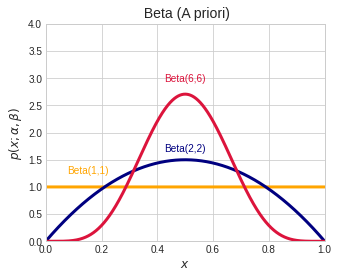

In [40]:
plt.rcParams['figure.figsize'] = [5, 4]

# Bell shape
x = np.linspace(0, 1, 10000)
y1 = st.beta.pdf(x, 1, 1)
y2 = st.beta.pdf(x, 2, 2)
y3 = st.beta.pdf(x, 6,6 )

plt.title(" Beta (A priori)", fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'$p(x;\alpha,\beta)$', fontsize=12)
plt.plot(x, y1, linewidth=3, color='orange')
plt.annotate("Beta(1,1)", xy=(0.15, 1.3), size = 10, ha='center', va='center', color='orange')
plt.plot(x, y2, linewidth=3, color='navy')
plt.annotate("Beta(2,2)", xy=(0.5, 1.7), size = 10, ha='center', va='center', color='navy')
plt.plot(x, y3, linewidth=3, color='crimson')
plt.annotate("Beta(6,6)", xy=(0.5, 3.0), size = 10, ha='center', va='center', color='crimson')
plt.ylim([0, 4])
plt.xlim([0, 1])
plt.show()

## Máquinas caça níquel
Iremos modelar o problema das máquinas caça níquel. O que queremos encontrar é qual máquina tem maior chance de sucesso investindo a menor quantia de dinheiro.

Existem várias estratégias, uma delas é usando amostragem de Thompsom.

Como vimos na teoria, seguiremos os seguintes passos:

1.   Inicialmente todas as máquinas tem probabilidade $p$ de sucesso distribuída igualmente entre $0-1$, através da função beta com $\alpha=\beta=1$.
2.   Dados os parâmetros $\alpha$ e $\beta$ usa-se a função `beta.rvs(alfa,beta)`. A máquina que, ao acaso, der a probabilidade mais alta será *testada*, ié, simularemos o uso dessa máquina comparando a probabilidade real $p$, com um valor randômico `np.random.random()`. Se a probabilidade real for maior que o valor randômico, considera-se que a máquina gerou uma recompensa a você (`outcome = 1`), caco contrário, consideramos que você perdeu dinheiro (`outcome = 0`).
1.   O resultado a posteriori é atualizado na máquina que foi testada, conforme a teoria. Isto é, um sucesso aumenta o valor de $\alpha$ e um fracasso aumenta o valor de $\beta$,
\begin{equation}
\alpha' = alpha + outcome \qquad \beta = \beta +(1-outcome)
\end{equation}
2.   Com os valores atualizados de $\alpha$ e $\beta$, volta-se ao item 2.

In [0]:
# O dicionário abaixo mostra a
# Obviamente, não teremos essa função em testes reais, mas teremos a máquina para testar
real_probs_dict = {'A':0.8,'B':0.4,'C':0.3}
# Nomes dados às máquinas
machines = ['A','B','C']
# Cores para os gráficos. Escolha as suas em 
# https://python-graph-gallery.com/100-calling-a-color-with-seaborn/
colors=['pink','peachpuff','powderblue']

In [0]:
'''
Esta função recebe como entrada três tuplas que especificam priorA, priorB, priorC
com respectivos valores de alpha e beta.
E retorna 3 valores randômicos da distribuição amostrados a partir de uma distribuição beta usando scipy.
Retorna o nome da máquina, A, B ou C, que apresentou o valor máximo amostrado dessas três distribuições.
'''
def find_machine(priorA,priorB,priorC):
    A_rvs = st.beta.rvs(priorA[0],priorA[1])
    B_rvs = st.beta.rvs(priorB[0],priorB[1])
    C_rvs = st.beta.rvs(priorC[0],priorC[1])
    return machines[np.argmax([A_rvs,B_rvs,C_rvs])]
'''
Esta é uma função que simula a realidade das máquinas.

'''
def simulate_game(machine, real_probs_dict):
    if real_probs_dict[machine]> np.random.random():
        return 1
    else:
        return 0

'''
Esta função recebe como entrada a máquina selecionada e retorna sua probabilidade a posteriori.
'''
def update_posterior(machine,priorA,priorB,priorC,outcome):
    if machine=='A':
        priorA=(priorA[0]+outcome,priorA[1]+1-outcome)
    elif machine=='B':
        priorB=(priorB[0]+outcome,priorB[1]+1-outcome)
    elif machine=='C':
        priorC=(priorC[0]+outcome,priorC[1]+1-outcome)
    return priorA,priorB,priorC

'''
Esta função plota a distribuição a posteriori
'''
def plot_posteriors(priorA,priorB,priorC,ax=None,title=None):
    parameters = [priorA,priorB,priorC]
    x = np.linspace(0.001, 1, 150)
    for i, (alpha, beta) in enumerate(parameters):
        color_i = colors[i]
        mach = machines[i]
        y = st.beta.pdf(x, alpha, beta)
        lines = sns.lineplot(x, y, label="%s (%.1f,%.1f)" % (mach, alpha, beta), color = color_i,ax=ax)
        plt.fill_between(x, 0, y, alpha=0.2, color=color_i)
        if title:
            plt.title(title)
        plt.autoscale(tight=True)
    plt.legend(title=r'$\alpha, \beta$ - parâmetros')
    return plt

In [80]:
#Iniciamos com alfa=beta=1 para todas as máquinas
priorA,priorB,priorC = (1,1),(1,1),(1,1)
# Em 'data' iremos guardar qual máquina "está ganhando" e os valores das probabilidades de sucesso das máquinas A,B,C

data = [('ABC',priorA,priorB,priorC)]
# Faremos N_tr tentativas
N_tr = 200
success = np.empty(N_tr)
for i in range(N_tr):
    # 1. decida a máquina que irá seu usada (inicialmente, valor aleatório)
    machine = find_machine(priorA,priorB,priorC)
    # 2. obtenha o resultado da máquina escolhida simulando um jogo
    outcome = simulate_game(machine, real_probs_dict)
    # 3. update o novo a priori baseado no resultado da máquina
    priorA,priorB,priorC = update_posterior(machine,priorA,priorB,priorC,outcome)
    # 4. Armazene os resultados em uma array
    data.append((machine,priorA,priorB,priorC))
    success[i] = outcome
    cumulative_average_success = np.cumsum(success) / (np.arange(N_tr) + 1)
print(data)

[('ABC', (1, 1), (1, 1), (1, 1)), ('C', (1, 1), (1, 1), (1, 2)), ('C', (1, 1), (1, 1), (1, 3)), ('B', (1, 1), (1, 2), (1, 3)), ('C', (1, 1), (1, 2), (2, 3)), ('A', (1, 2), (1, 2), (2, 3)), ('A', (1, 3), (1, 2), (2, 3)), ('B', (1, 3), (1, 3), (2, 3)), ('B', (1, 3), (2, 3), (2, 3)), ('C', (1, 3), (2, 3), (2, 4)), ('B', (1, 3), (2, 4), (2, 4)), ('C', (1, 3), (2, 4), (2, 5)), ('A', (1, 4), (2, 4), (2, 5)), ('A', (2, 4), (2, 4), (2, 5)), ('B', (2, 4), (2, 5), (2, 5)), ('C', (2, 4), (2, 5), (2, 6)), ('C', (2, 4), (2, 5), (3, 6)), ('C', (2, 4), (2, 5), (4, 6)), ('A', (3, 4), (2, 5), (4, 6)), ('B', (3, 4), (2, 6), (4, 6)), ('C', (3, 4), (2, 6), (5, 6)), ('C', (3, 4), (2, 6), (6, 6)), ('C', (3, 4), (2, 6), (6, 7)), ('C', (3, 4), (2, 6), (6, 8)), ('A', (4, 4), (2, 6), (6, 8)), ('A', (5, 4), (2, 6), (6, 8)), ('C', (5, 4), (2, 6), (6, 9)), ('A', (6, 4), (2, 6), (6, 9)), ('A', (7, 4), (2, 6), (6, 9)), ('A', (8, 4), (2, 6), (6, 9)), ('A', (9, 4), (2, 6), (6, 9)), ('A', (10, 4), (2, 6), (6, 9)), ('A'

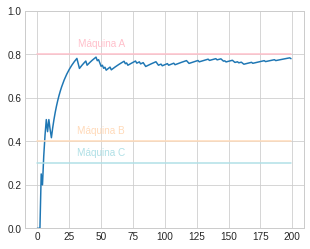

In [75]:
# Plotando os resultados
plt.plot(cumulative_average_success)
plt.plot(np.ones(N_tr)*real_probs_dict['A'],color = colors[0])
plt.annotate('Máquina A', xy=(50, real_probs_dict['A']+0.05), size = 10, ha='center', va='center', color=colors[0])
plt.plot(np.ones(N_tr)*real_probs_dict['B'],color = colors[1])
plt.annotate('Máquina B', xy=(50, real_probs_dict['B']+0.05), size = 10, ha='center', va='center', color=colors[1])
plt.plot(np.ones(N_tr)*real_probs_dict['C'],color = colors[2])
plt.annotate('Máquina C', xy=(50, real_probs_dict['C']+0.05), size = 10, ha='center', va='center', color=colors[2])
plt.ylim((0,1.0))
plt.show()

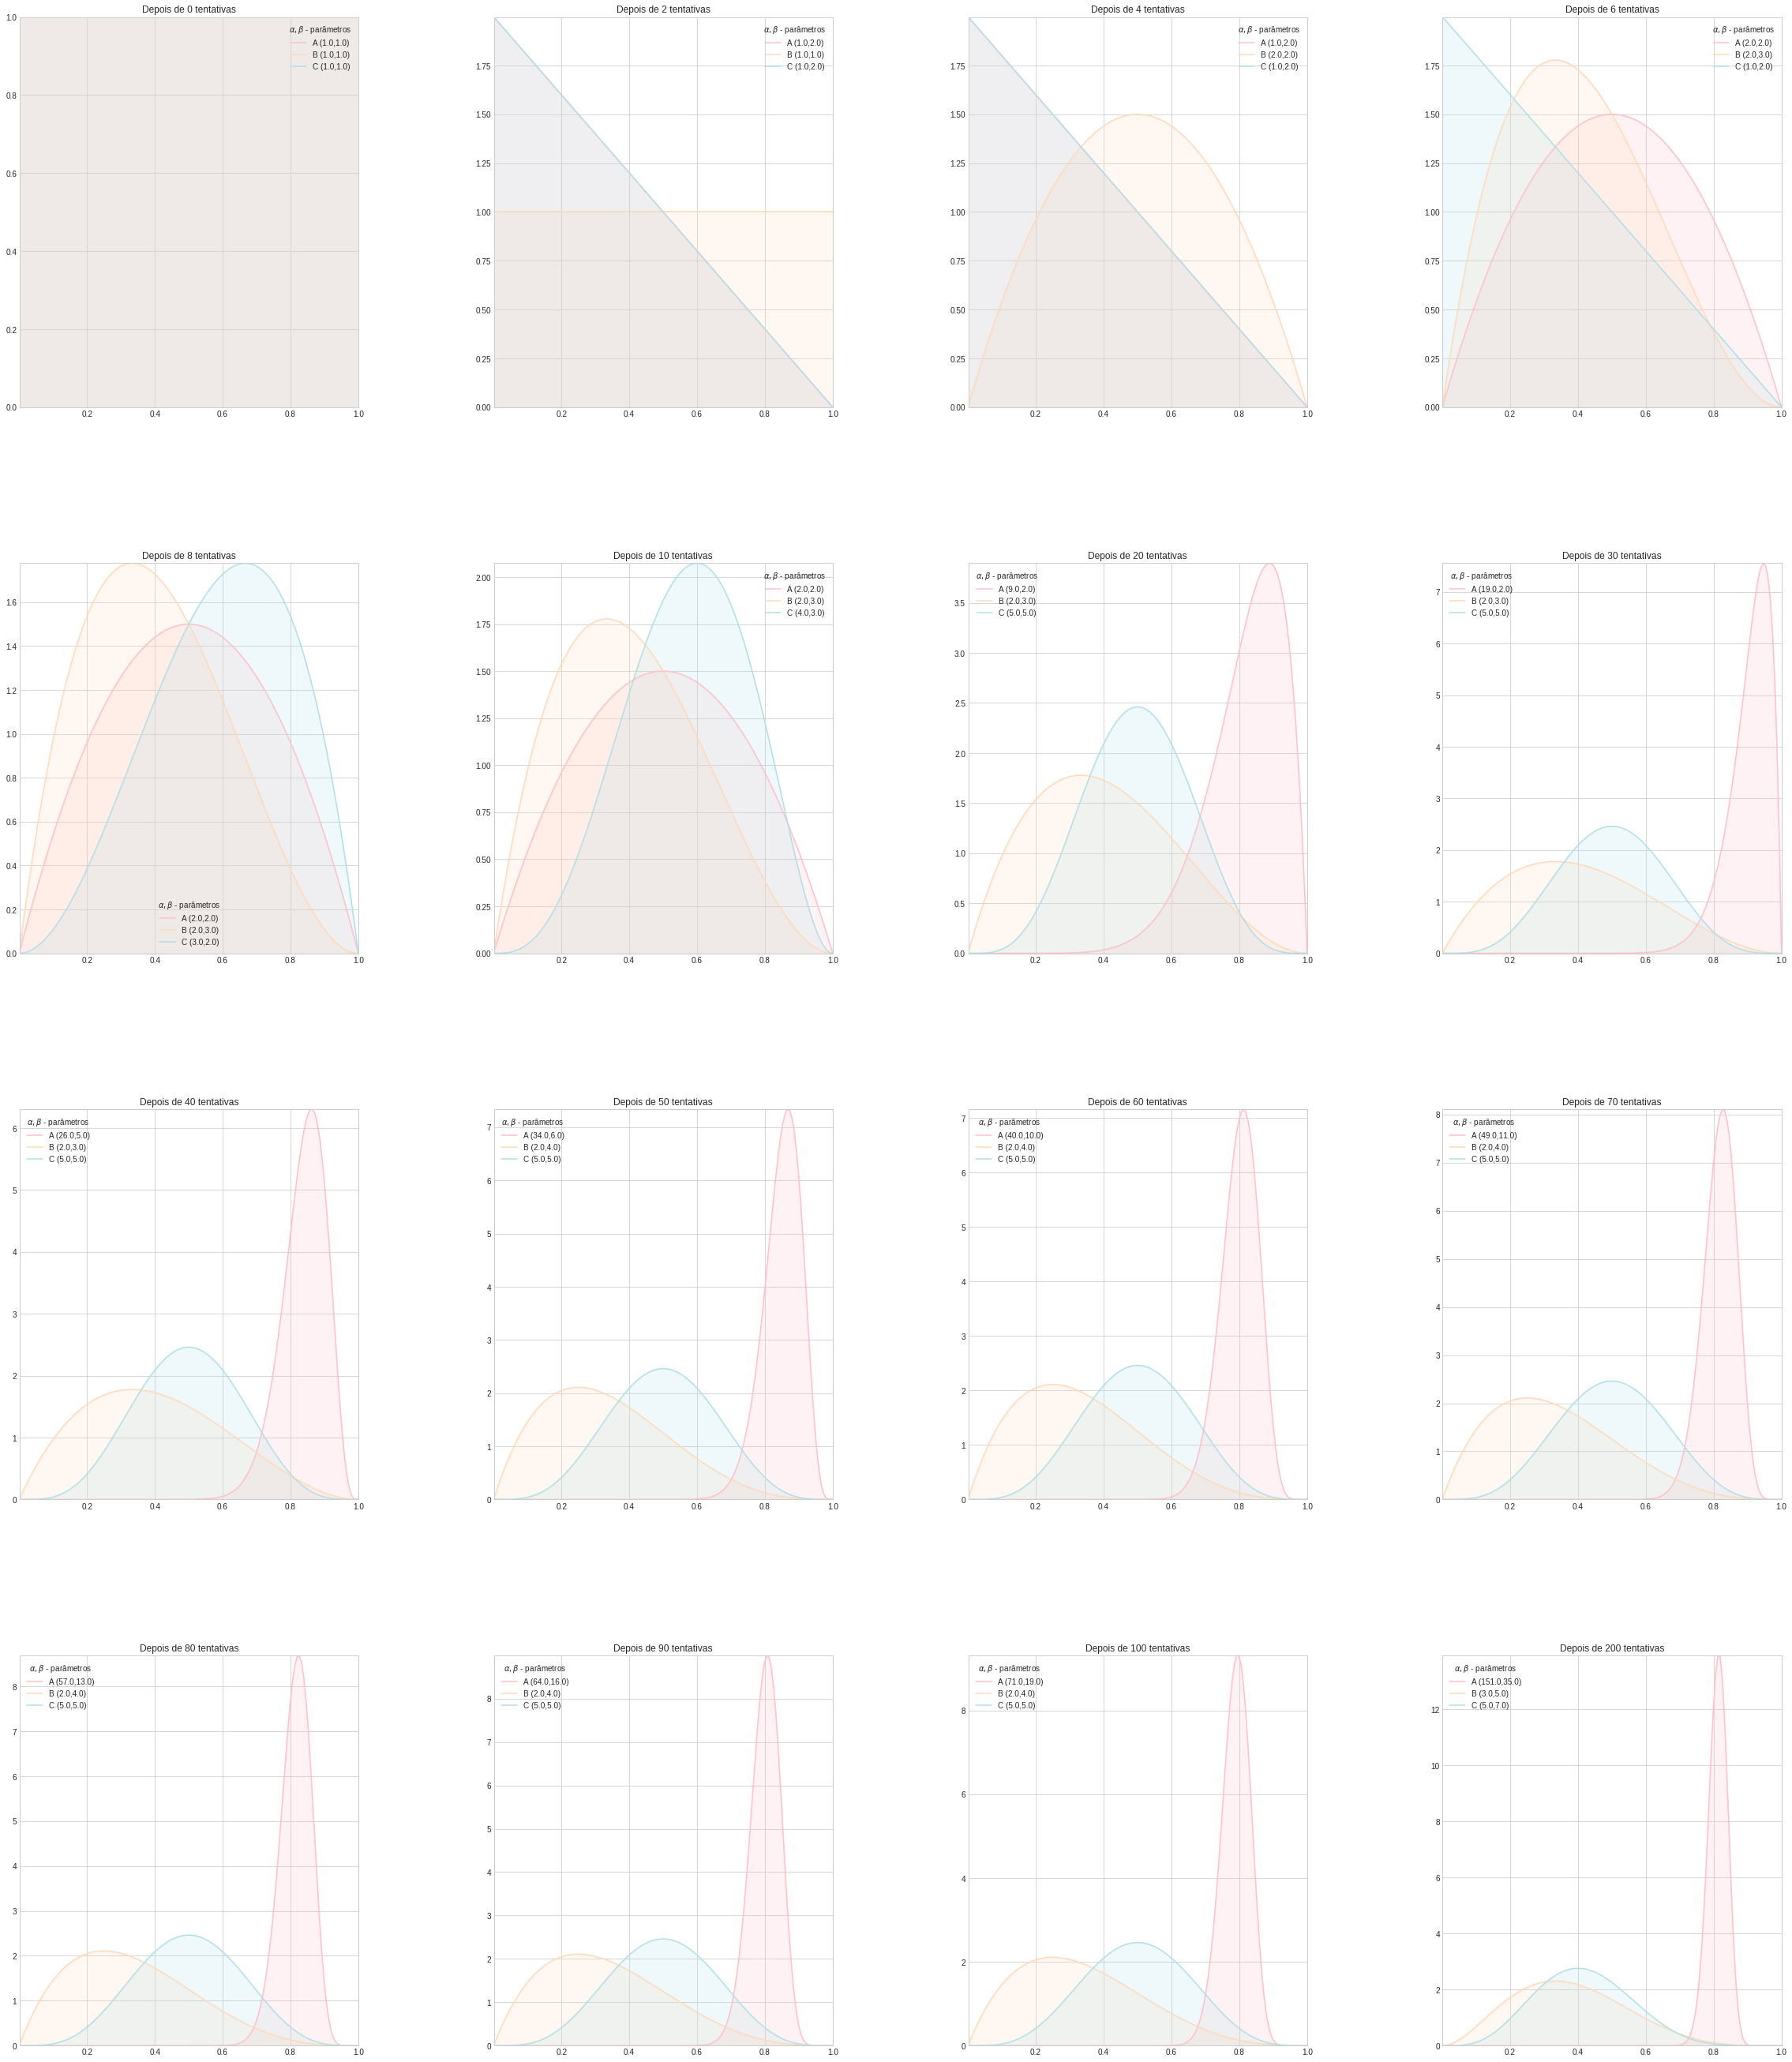

In [77]:
fig = plt.figure(figsize=(40, 60))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
cnt=1
i_range = [0, 2, 4 , 6, 8, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 200]
for i in i_range:
    ax = fig.add_subplot(5, 4, cnt)
    g = plot_posteriors(*data[i][1:],ax,"Depois de "+str(i)+" tentativas")
    cnt+=1
plt.show()

As jogadas com as máquinas A, B, C foram, respectivamente: 125 61 14


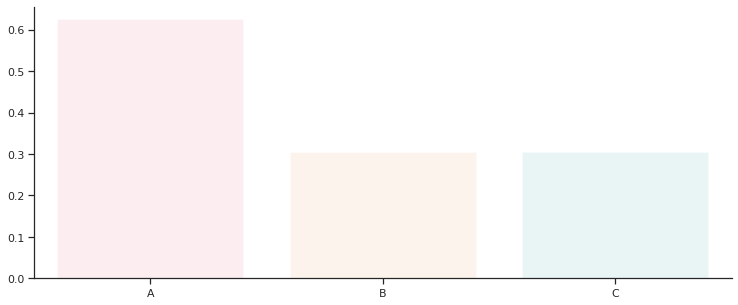

In [0]:
fig = plt.figure(figsize=(12.5, 5))
machine_name = list(zip(*data))[0]

count_A = machine_name.count('A')
count_B = machine_name.count('B')
count_C = machine_name.count('C')
print('As jogadas com as máquinas A, B, C foram, respectivamente:', count_A, count_B, count_C)
sns.set(style="ticks")
sns.barplot(x=['A','B','C'],y=[count_A/N_tr,count_B/N_tr,count_B/N_tr],palette=[colors[0],colors[1],colors[2]],alpha=0.3)
sns.despine()

# <font color=green > Sua tarefa 

<font color=green >O algoritmo que utilizamos para escolher a máquina que iremos jogar é através de uma escolha aleatória, utilizando os parâmetros $\alpha$ e $\beta$ atualizados. Existem algoritmos um pouco mais interessantes, destacando-se:
* <font color=green > 
Epsilon greedy
* UCB1

<font color=green >Tente modificar o modelo anterior para o problema MAB (Multi Armed Bandit) e compare as respostas. Qual técnica você utilizaria em um cassino?

[UCB](https://cse442-17f.github.io/LinUCB/)

